In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sq3

# Yahoo finance
import yfinance as yf

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

In [2]:
start=pd.to_datetime('1990-01-01', format='%Y-%m-%d')
today_date = datetime.today().strftime('%Y-%m-%d')

In [3]:
df = yf.download("JPY=x", start=start,end=today_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-10-30,114.370003,114.480003,113.610001,114.180000,114.180000,0
1996-11-01,113.500000,113.500000,113.500000,113.500000,113.500000,0
1996-11-04,113.279999,113.980003,112.949997,113.879997,113.879997,0
1996-11-05,113.709999,114.330002,113.449997,114.250000,114.250000,0
1996-11-06,114.230003,114.680000,113.650002,113.949997,113.949997,0
...,...,...,...,...,...,...
2024-08-13,146.981995,147.929993,146.910995,146.981995,146.981995,0
2024-08-14,146.970993,147.552002,146.080994,146.970993,146.970993,0
2024-08-15,147.253006,149.263000,147.063004,147.253006,147.253006,0


In [5]:
df['MA1'] = df['Close'].rolling(window=50).mean()
df['MA2'] = df['Close'].rolling(window=296).mean()
df['returns'] = np.log(df['Close'] / df['Close'].shift(1))
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1996-10-30  114.370003  114.480003  113.610001  114.180000  114.180000   
1996-11-01  113.500000  113.500000  113.500000  113.500000  113.500000   
1996-11-04  113.279999  113.980003  112.949997  113.879997  113.879997   
1996-11-05  113.709999  114.330002  113.449997  114.250000  114.250000   
1996-11-06  114.230003  114.680000  113.650002  113.949997  113.949997   
...                ...         ...         ...         ...         ...   
2024-08-13  146.981995  147.929993  146.910995  146.981995  146.981995   
2024-08-14  146.970993  147.552002  146.080994  146.970993  146.970993   
2024-08-15  147.253006  149.263000  147.063004  147.253006  147.253006   
2024-08-16  149.222000  149.229996  147.639008  149.222000  149.222000   
2024-08-17  149.296997  149.319000  147.561005  147.578995  147.578995   

            Volume        MA1        

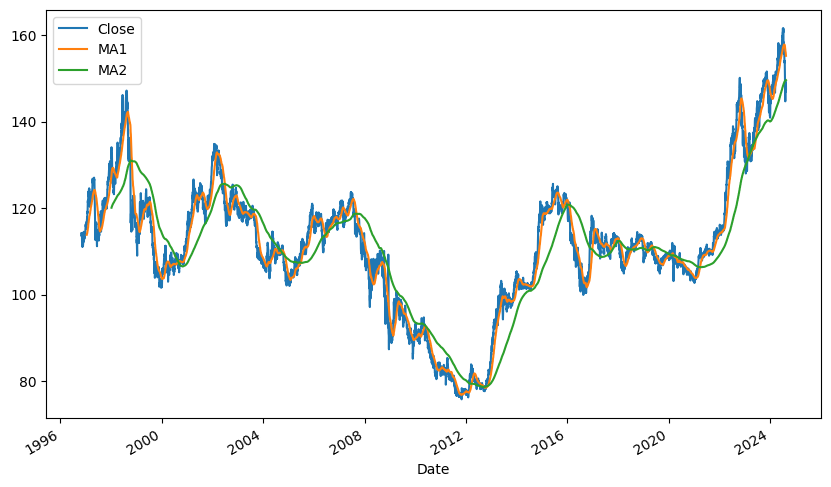

In [7]:
df[['Close', 'MA1','MA2']].plot(figsize=(10, 6));

In [8]:
df['position'] = np.where(df['MA1'] > df['MA2'],1, -1)

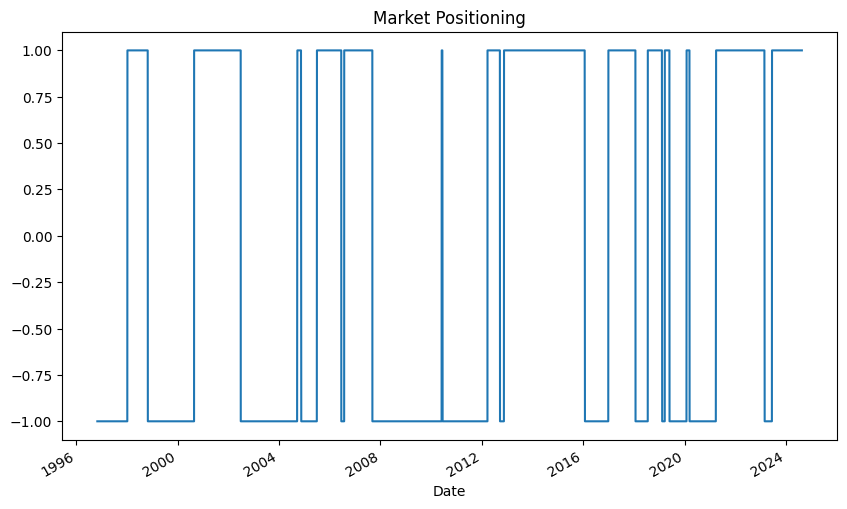

In [9]:
df['position'].plot(ylim=[-1.1, 1.1],
title='Market Positioning',
figsize=(10, 6));

In [10]:
df['strategy'] = df['position'].shift(1) * df['returns']

In [11]:
df[['returns', 'strategy']].sum()

returns     0.256587
strategy    0.669180
dtype: float64

In [12]:
df[['returns', 'strategy']].sum().apply(np.exp)

returns     1.292512
strategy    1.952636
dtype: float64

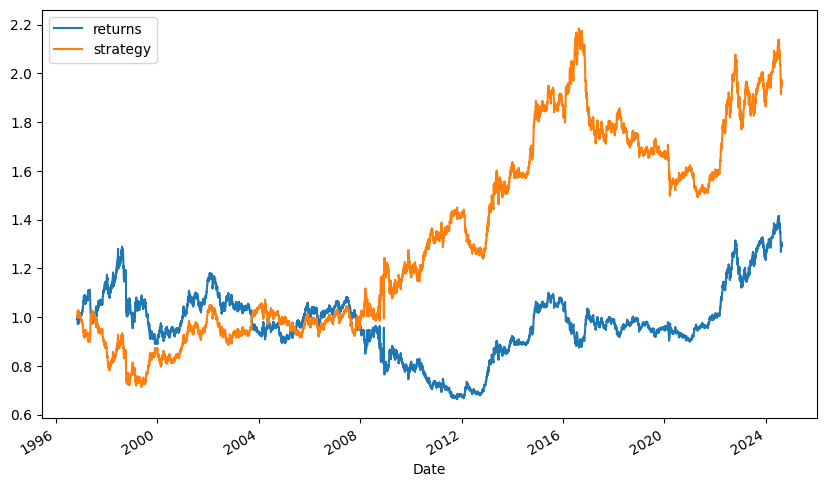

In [13]:
df[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));